# Setup

In [1]:
import numpy as np
import pylab as plt

from sklearn.datasets import make_circles, load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# **AdaBoost**

Boosting is a powerful technique used to construct a committee whose performance is significantly better than that of every single model within that committee. It delivers the most significant improvements when the predictions of individual models are slightly better than random predictions. In this case, the individual models are also called weak learners.

It consists of the following steps:
- The individual models, such as base classifiers are trained in sequence.
- Each base classifier is trained using weighted training data.
- The weighting coefficients of each sample depend on the performance of the previously trained base classifiers. In particular, misclassified data points receive a higher weight for the next classifier's training.
- After training all the base classifiers, these are combined through a suitably weighted average of individual model outputs.

(100, 2) (100,)


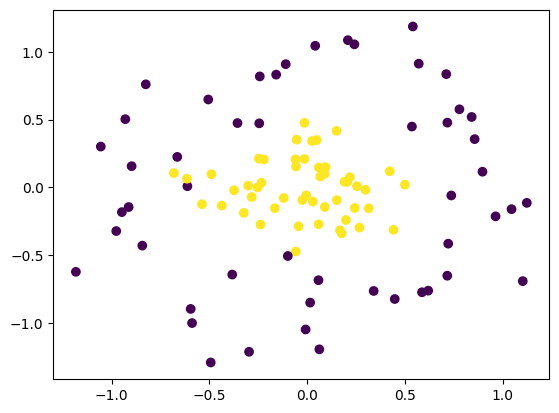

In [2]:
np.random.seed(2)
X, y = make_circles(factor=.2, noise=.2)
y[y==0] = -1
print(X.shape, y.shape)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [3]:
def plot_contour(clf, X, y, sample_weight=None):
    xx, yy = np.mgrid[-3:3:.1,-3:3:.1]
    zz = np.c_[xx.ravel(), yy.ravel()]
    proba = clf.predict(zz).reshape(xx.shape)

    # Normalize in intervall 40 to 240
    if sample_weight is not None:
        sample_weight = np.clip(sample_weight, 20, 500)
    #plt.figure(figsize=(40, 40))
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=2, s=sample_weight, cmap='coolwarm', edgecolors='k')
    plt.contourf(xx, yy, proba, zorder=1, alpha=.5, cmap='coolwarm')
    plt.show()

> Implement the AdaBoost algorithm.

Use the `DecisionTreeClassifier(max_depth=1)` as the weak learner. Its method `.fit(X, y, sample_weight=sample_weight)` has a additional argument such that we can specify the sample weights considered in the loss function.

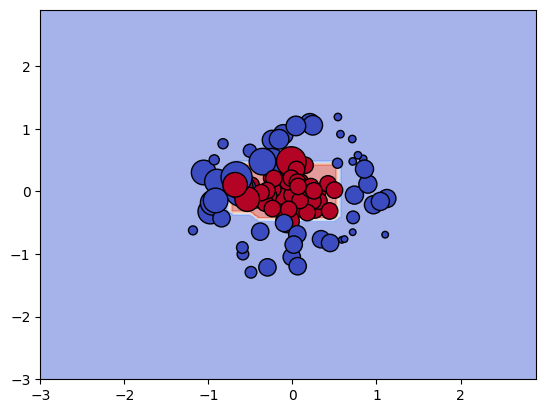

In [4]:
class Boosting:
    def __init__(self, n_models=100):
        self.n_models = n_models
        self.models = []
        self.model_accuracy = []
        self.epsilons = []
        

    def fit(self, X, y, plot=False):
        self.sample_weight = np.ones(len(y))
        for m in range(self.n_models):
            clf = DecisionTreeClassifier(max_depth=1)
            clf.fit(X, y, sample_weight=self.sample_weight)
            self.models.append(clf)

            y_pred = clf.predict(X)
            error = np.sum(self.sample_weight[y != y_pred])
            normalized_error = error / np.sum(self.sample_weight)
            self.epsilons.append(normalized_error)
            alpha = np.log((1 - normalized_error) / normalized_error)
            self.model_accuracy.append(alpha)
            self.sample_weight[y != y_pred] *= np.exp(alpha)

            if plot and m % 1  == 0:
                plot_contour(self, X, y, self.sample_weight)

    def predict(self, X):
        pred = np.zeros(len(X))
        for alpha_m, clf in zip(self.model_accuracy, self.models):
            pred += alpha_m * clf.predict(X)
        return np.sign(pred)

clf = Boosting(n_models=20)
clf.fit(X, y, plot=False)
plot_contour(clf, X, y, clf.sample_weight)

> Visualize the decision boundaries for different number of estimators during training similar to Figure 14.2 in [Bishop2006]

In [5]:
####################
# Your Code Here   #
####################

> Test your implementation using the given more difficult dataset.

(241, 64) (120, 64) (241,) (120,)


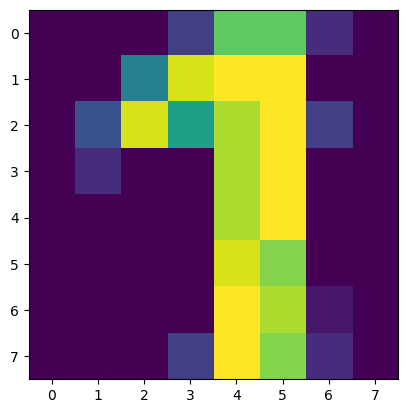

In [6]:
X, y = load_digits(return_X_y=True)
idx = (y==1) | (y == 7)
X, y = X[idx], y[idx]
y[y==1] = 1
y[y==7] = -1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,  random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

plt.imshow(X_train[np.random.randint(len(X_train))].reshape(8, 8))
plt.show()

> Train multiple Boosting models with an increasing number of estimators.  In each iteration, store training error, test error, alphas and epsilons. Investigate how these quantities behave with respect to the estimators.

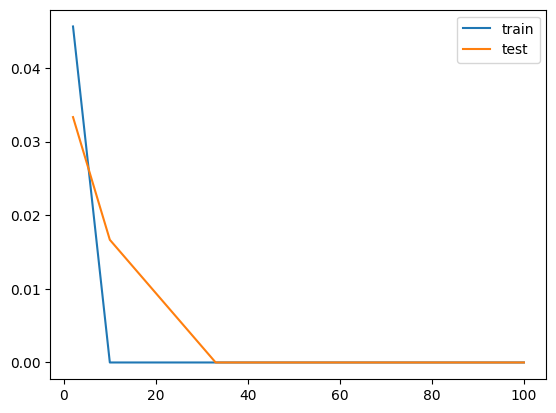

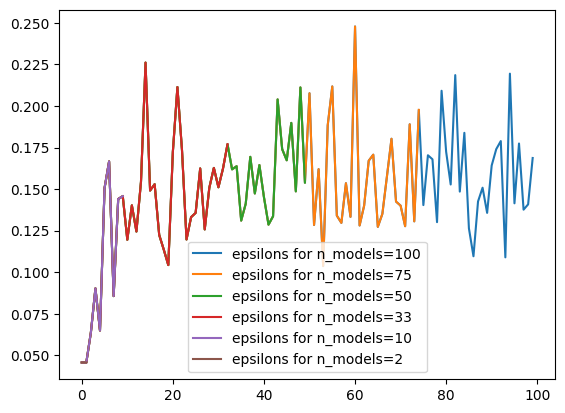

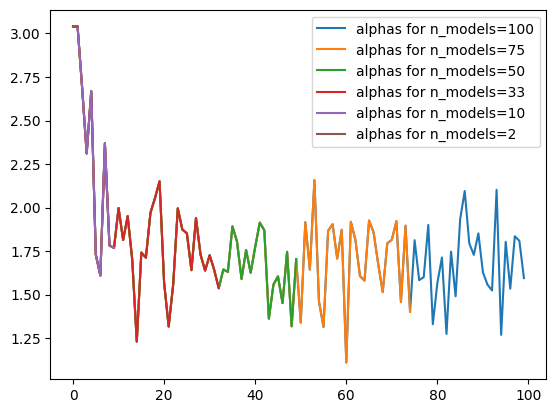

In [20]:
train_errors = []
test_errors = []
epsilons_list = []
alpha_list = []
num_models = [2, 10, 33, 50, 75, 100]
for n_models in num_models:
    clf = Boosting(n_models=n_models)
    clf.fit(X_train, y_train, plot=False)
    #plot_contour(clf, X_train, y_train, clf.sample_weight)
    train_errors.append(np.mean(clf.predict(X_train) != y_train))
    test_errors.append(np.mean(clf.predict(X_test) != y_test))
    epsilons_list.append(clf.epsilons)
    alpha_list.append(clf.model_accuracy)

plt.figure()
plt.plot(num_models, train_errors, label='train')
plt.plot(num_models, test_errors, label='test')
plt.legend()
plt.show()

for i in range(len(num_models)-1, -1, -1):
    plt.plot(epsilons_list[i], label="epsilons for n_models={}".format(num_models[i]))
plt.legend()
plt.show()

for i in range(len(num_models)-1, -1, -1):
    plt.plot(alpha_list[i], label="alphas for n_models={}".format(num_models[i]))
plt.legend()
plt.show()
